# Clasificación de Notas Musicales Mediante Umbrales

### Jorge De Pablo Martínez | María Guadaño Nieto | Irene Rodríguez García 


## Introducción

El objetivo de esta práctica es que ante una entrada (un fichero de audio con una nota aislada), te devuelva que nota es y a que octava pertenece.

Para el funcionamiento de nuestra práctica se necesitan: 
* Fichero en formato .json que contiene las frecuencias fundamentales de las notas de la primera octava.
* Módulos de de python tds_utils.py y thresholds.py. 
* Archivos de audio que usaremos para nuestra matriz test para comprobar el correcto funcionamiento.
* Archivo de audio del que se quiere obtener la nota (entrada).

## 1 
En este primer bloque formamos las estructuras de datos principales, todos los imports, y las variables que usaremos a lo largo de la práctica como los umbrales y la nota a analizar,

In [173]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wf
import scipy.signal as ss
import sounddevice as sd
import spectrum

import thresholds
import tds_utils

FILE = "src/notes.json"
OCTAVES_NUM = 5
TH_MIN = 25
NOTES = ['Do', 'Re', 'Mi', 'Fa', 'Sol', 'La', 'Si']
# Hay que estudiar la posibilidad de poder meter los sostenidos y bemoles, cuando funciones la primera versión 

thresholds = thresholds.get_thresholds(NOTES, FILE, OCTAVES_NUM, TH_MIN) 
# obtengo los umbrales con el script de python que me hice

# esto es una traza
print(thresholds[4])
# lo que imprime, el primer número es el umbral por abajo y el segundo la fc(teórica) de cada nota. 
# de manera que si la frecuencia que sacamos esta por encima del umbral por abajo de una nota (re) 
# y por debajo del umbral por abajo de la siguiente (mi) es un Re la nota

note = 'fa-1-piano'
filename = ('src/notes/' + note + '.wav')



{'Do': (508.56, 523.248), 'Re': (555.29, 587.328), 'Mi': (623.29, 659.248), 'Fa': (678.86, 698.464), 'Sol': (741.22, 783.984), 'La': (831.99, 880.0), 'Si': (933.88, 987.76)}


## 2 
Ahora formamos nuestra matriz test, pasamos el algoritmo principal a las notas de la matriz test y contrastamos los resultados con el objetivo de validar el algoritmo. 

In [174]:
# Hay que hacer una matriz test. 

# Se le pone en una columna nombre de la nota, en la segunda la nota.wav
# al mneos con 10 notas diferentes 

# se pasa el algoritmo principal (que no tenemos) a cada nota y se va creando la matriz results 
# si la primera columna de la matriz test es igual que la matriz results el algoritmo funciona




## 3 
Obtenemos el las característica de la señal principal y formamos el eje de tiempo para poder representar la señal y el espectro. 

<IPython.core.display.Javascript object>


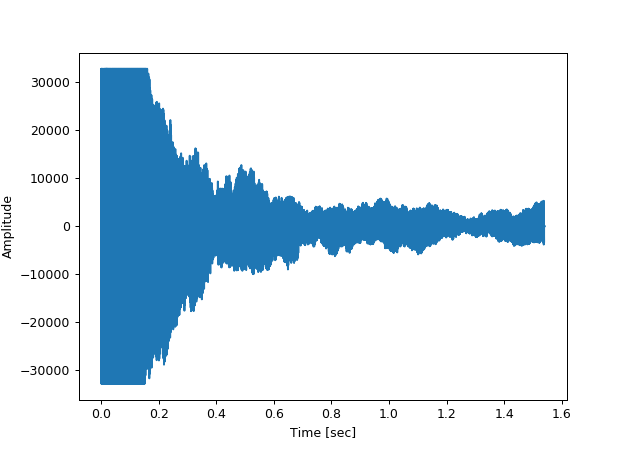

Text(0, 0.5, 'Amplitude')

In [175]:
fs,y = wf.read(filename)

# falla en mi ordenador de la uni, probar en casa 
#sd.play(y,fs)

# modifico la señal de audio para quedarnos con lo que nos interesa 
# creo el vector para poder representarlo (el eje)
y = y[:,0]
t = np.arange(0,len(y))/fs

# para representar
plt.figure(figsize = (7,5))
plt.plot(t, y)
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude')

# en realidad es solo para representar esta mierda no vale para nada pero queda bonito

<IPython.core.display.Javascript object>


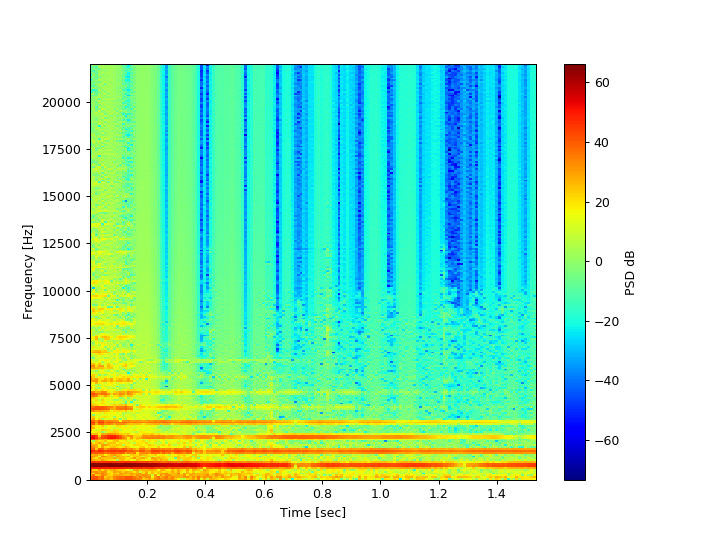

In [176]:
# resolución del espectograma en banda ancha 
# lo he cogido de la practica 5, en realidad no sirve para nada pero ahí esta molan los colorcitos
N = int(0.010*fs)
tds_utils.my_spectrogram(y,N,fs)

## 4 
Enventanamos la señal, obtenemos la densidad espectral de la señal con tds_utils, representamos el espectro y obtenemos la frecuencia fundamental a a partir de este. 

<IPython.core.display.Javascript object>


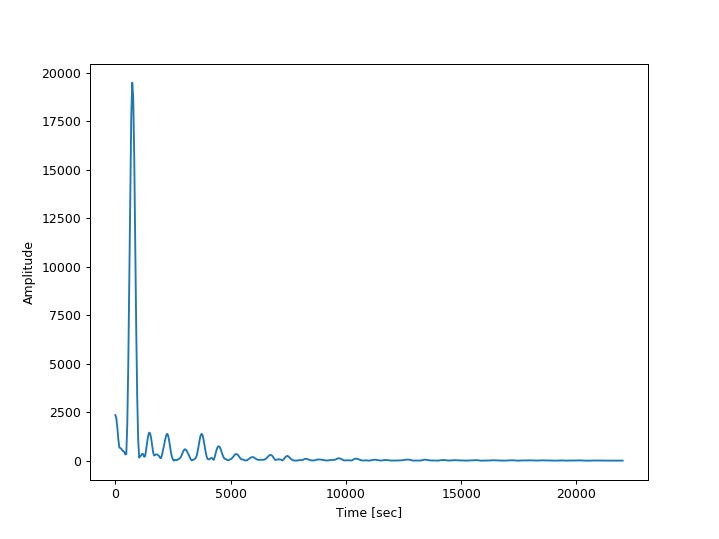

732.12890625


In [177]:
# enventanamiento y representar, el primer pico es la frecuencia de la nota
# he cogido el enventanamiento de la práctica 5, habrá que buscar el enventanamiento adecuado y un porqué
s1 = y[1000:1300]
#s2 = y[9200:9475]

psd1,f1 = tds_utils.my_spectra(s1,fs)
#psd2,f2 = tds_utils.my_spectra(s2,fs)
# creo que valdría solo con una pero no se
idx = f1 >= 0
plt.figure(figsize=(8,6))
#plt.subplot(211)
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude') # esto no es time y amplitude, saber que arroja my_espectra

plt.plot(f1[idx],psd1[idx])

#plt.subplot(212)
#plt.plot(f2[idx],psd2[idx])

# la funcion find_peaks me la recomendó Rebeca en clase pero no se como funciona,
# se supone que se le pasa una señal (el espectro que devuelve my_spectra ?? )
# y te devuelve los picos, creo que el primero es la nota y los demás los ármonicos 
# será el más alto la nota y no los armónicos ?? 
n1 = ss.find_peaks(psd1)
#rint(n1)

peak = np.argmax(psd1)
fc = abs(f1[peak])
print(fc)

## 5 
Comparo la frecuencia de la nota con mi diccionario de umbrales que me he creado al principio. 
Primero decidimos en que umbral está la nota (margen más amplio) y depues nos recorremos los umbrales de esa octava para clasificarla mediante dos umbrales. 

In [ ]:
# tengo una ligera idea de como hacer esto pero necesito la fc de la nota 

# print de nota y acaba el programa 